# Chiller plant decision tree analysis

The purpose of this notebook is to analyze the features and data with decision trees.

In [50]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import glob
import os
from dataCleaning import bas_filter
%matplotlib inline

In [51]:
def data_import(dat_folder, string, keys):
    
    dat_list = [f for f in glob.glob(os.path.join(dat_folder, string + '*'))]
    print(dat_list)
    
    df = pd.DataFrame()
    for lst in dat_list:
        df_add = pd.read_csv(lst)
        df = pd.concat([df, df_add], ignore_index=True)
    key = pd.read_excel(keys)
    
    return df, key

In [53]:
df_plt1, key = data_import(
    '../../Plt1', 'Plt1 h', 
    '../../Plt1/Plt1 Points List.xlsx')

['../../Plt1\\Plt1 h 2016-11.csv', '../../Plt1\\Plt1 h 2017-01.csv', '../../Plt1\\Plt1 h 2017-03.csv', '../../Plt1\\Plt1 h 2017-05.csv', '../../Plt1\\Plt1 h 2017-07.csv', '../../Plt1\\Plt1 h 2017-09.csv']


In [54]:
def data_BAS(df_plt1, key):
    # collects DataPointNames from the points list spreadsheet that are BAS point types
    key_bas = key.loc[key['PointType'].str.contains("BAS")==True,'DataPointName']

    #converts pandas series to a list for future use
    val = key_bas.values.T.tolist()

    #removes DataPointNames that containt the prefix CHWV
    vals = [x for x in val if not x.startswith('CHWV')]

    #tests whether all values from the point list spreadsheet are column headings of the dataset
    for x in vals:
        if x not in df.columns:
            #prints and removes any string not found in the data
            print(x)
            vals.remove(x)
        
    #expresses data using columns specified by the vals list
    bas = df[vals+['OptimumControl', 'kW/Ton']]
    
    print('Original data contains '+str(df.shape[0])+' points and '+str(df.shape[1])+ ' dimensions.')
    print('Filtered data contains '+str(bas.dropna().shape[0])+' points and '+str(bas.dropna().shape[1])+ ' dimensions.')
    return bas.dropna()

In [55]:
bas = data_BAS(df_plt1, key)
bas.shape

CommunicationFailure_COV
Original data contains 8516 points and 414 dimensions.
Filtered data contains 8115 points and 66 dimensions.


(8115, 66)

In [57]:
key_alarm = key[key['Units'].str.contains("Normal/Alarm")==True]
key_alarm_BAS = key_alarm.loc[key['PointType'].str.contains("BAS")==True, 'DataPointName']
print(key_alarm_BAS)

274    CommunicationFailure
299              CTTR_ALARM
365            PCHWP3Failed
372            PCHWP4Failed
379            PCHWP5Failed
420            SCHWP3Failed
427            SCHWP4Failed
434            SCHWP5Failed
Name: DataPointName, dtype: object


In [58]:
for alm in key_alarm_BAS:
    bas = bas[bas[alm] == 0]
bas = bas[bas['OptimumControl'] == 1]

In [59]:
bas.shape

(7952, 66)

In [60]:
def alarm_filter(bas, key):
    key_alarm = key[key['Units'].str.contains("Normal/Alarm")==True]
    key_alarm_BAS = key_alarm.loc[key['PointType'].str.contains("BAS")==True, 'DataPointName']
    
    for alm in key_alarm_BAS:
        bas = bas[bas[alm] == 0]
    bas = bas[bas['OptimumControl'] == 1]
    return bas

In [61]:
bas1 = alarm_filter(bas, key)
bas1.shape

(7952, 66)

In [47]:
#df_plt1 = pd.read_csv('../../Plt1/Plt1 h 2017-09.csv')
#df = pd.read_csv('../../Plt1/Plt1 h 2017-09.csv')
#df_plt2 = pd.read_csv('../../Plt2/Plt2 h 2017-07.csv')

In [8]:
df_plt1.dropna()

,timestamp,CH3LoadDisp,CH3PctLoad,CH4LoadDisp,CH4PctLoad,CH5LoadDisp,CH5PctLoad,CHkW%,CHTON%,PercentAnnualSavings,...,CH5SURGE,LOOPREQ,RUNCHLR3,RUNCHLR4,RUNCHLR5,CH3SURGECNT,CH4SURGECNT,CH5SURGECNT,CLGMODE,StationSTG
60,2017-09-03T12:00:00.000Z,0.000000,0.00000,87.101169,87.101168,0.982292,0.982292,71.551070,86.750559,0.000124,...,0.0,1.0,0.000000,1.000000,0.166667,13.0,0.0,0.0,0.0,1.166667
61,2017-09-03T13:00:00.000Z,0.000000,0.00000,61.628025,61.649601,32.699242,32.699242,28.800355,46.600451,0.000184,...,0.0,1.0,0.000000,1.000000,1.000000,13.0,0.0,0.0,0.0,2.000000
62,2017-09-03T14:00:00.000Z,0.000000,0.00000,65.271903,65.271902,34.757415,34.667396,31.222250,49.421877,0.000195,...,0.0,1.0,0.000000,1.000000,1.000000,13.0,0.0,0.0,0.0,2.000000
63,2017-09-03T15:00:00.000Z,0.000000,0.00000,62.073736,60.817505,35.873339,35.490721,31.827724,50.010946,0.000182,...,0.0,1.0,0.166667,1.000000,1.000000,13.0,0.0,0.0,0.0,2.000000
66,2017-09-03T18:00:00.000Z,0.000000,0.00000,66.073464,66.073463,37.944247,37.944247,34.189070,52.350163,0.000190,...,0.0,1.0,0.000000,1.000000,1.000000,13.0,0.0,0.0,0.0,2.000000
67,2017-09-03T19:00:00.000Z,0.000000,0.00000,64.536953,64.555182,36.308257,36.305479,32.816663,50.486619,0.000187,...,0.0,1.0,0.000000,1.000000,1.000000,13.0,0.0,0.0,0.0,2.000000
68,2017-09-03T20:00:00.000Z,0.000000,0.00000,60.918676,60.918676,33.823301,33.823301,30.818600,47.683522,0.000179,...,0.0,1.0,0.000000,1.000000,1.000000,13.0,0.0,0.0,0.0,2.000000
69,2017-09-03T21:00:00.000Z,0.000000,0.00000,57.567634,57.580631,32.202592,32.206610,29.244369,44.708515,0.000156,...,0.0,1.0,0.000000,1.000000,1.000000,13.0,0.0,0.0,0.0,2.000000
70,2017-09-03T22:00:00.000Z,0.000000,0.00000,40.959836,41.008944,42.549615,42.540327,31.184866,50.812883,0.000141,...,0.0,1.0,0.000000,0.666667,1.000000,13.0,0.0,0.0,0.0,1.583333
71,2017-09-03T23:00:00.000Z,0.000000,0.00000,0.000000,0.000000,78.306298,77.869101,50.595238,78.069033,0.000098,...,0.0,1.0,0.000000,0.000000,1.000000,13.0,0.0,0.0,0.0,1.000000


In [10]:
key = pd.read_excel('../../Plt1/Plt1 Points List.xlsx')

In [11]:
key_bas = key.loc[key['PointType'].str.contains("BAS")==True,'DataPointName']
vals = key_bas.values.T.tolist()
vals.append('kW/Ton')
print(vals)

['CDWVLV', 'CDWVLV2', 'CHkW', 'CHWDP2', 'CHWFLO', 'CHWRT', 'CHWRT2', 'CHWRT3', 'CHWST', 'CHWST2', 'CHWST3', 'CHWV10', 'CHWV11', 'CHWV12', 'CHWV13', 'CHWV14', 'CHWV15', 'CHWV16', 'CHWV17', 'CHWV18', 'CHWV19', 'CHWV20', 'CHWV21', 'CHWV22', 'CHWV23', 'CHWV24', 'CHWV25', 'CHWV26', 'CHWV27', 'CHWV3', 'CHWV4', 'CHWV5', 'CHWV6', 'CHWV7', 'CHWV9', 'CLGMODE', 'CommunicationFailure', 'CommunicationFailure_COV', 'CTTR_ALARM', 'HX1CDWRT', 'HX1CDWST', 'HX1CDWVLV', 'HX1CHWRT', 'HX1CHWST', 'HX1CHWVLV', 'LOOPREQ', 'MaxCHDPLift', 'MaxCHDTLift', 'MinCHDPLift', 'MinCHDTLift', 'OAH', 'OAT', 'OAWB', 'PCHWP3Failed', 'PCHWP3HZ', 'PCHWP3kW', 'PCHWP3S', 'PCHWP3SPD', 'PCHWP3SS', 'PCHWP4Failed', 'PCHWP4HZ', 'PCHWP4kW', 'PCHWP4S', 'PCHWP4SPD', 'PCHWP4SS', 'PCHWP5Failed', 'PCHWP5HZ', 'PCHWP5kW', 'PCHWP5S', 'PCHWP5SPD', 'PCHWP5SS', 'SCHWP3Failed', 'SCHWP3HZ', 'SCHWP3kW', 'SCHWP3S', 'SCHWP3SPD', 'SCHWP3SS', 'SCHWP4Failed', 'SCHWP4HZ', 'SCHWP4kW', 'SCHWP4S', 'SCHWP4SPD', 'SCHWP4SS', 'SCHWP5Failed', 'SCHWP5HZ', 'SCHWP

In [12]:
for x in vals:
    if x not in df_plt1.columns:
        print(x)
        vals.remove(x)

CommunicationFailure_COV


In [62]:
#bas = df_plt1[vals].dropna()
#bas.shape

In [63]:
bas.describe()

,CDWVLV,CDWVLV2,CHkW,CHWDP2,CHWFLO,CHWRT,CHWRT2,CHWRT3,CHWST,CHWST2,...,SCHWP4SPD,SCHWP4SS,SCHWP5Failed,SCHWP5HZ,SCHWP5kW,SCHWP5S,SCHWP5SPD,SCHWP5SS,OptimumControl,kW/Ton
count,7952.0,7952.0,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,...,7952.000000,7952.0,7952.0,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.0,7952.000000
mean,1.0,1.0,90.631427,11.123248,718.494773,56.556162,54.273448,59.176313,43.068965,43.831945,...,79.415630,1.0,0.0,32.658025,1.984332,0.653431,54.429089,0.668825,1.0,0.433298
std,0.0,0.0,53.120275,2.258998,212.677987,1.144944,1.247508,1.819638,1.532754,1.617357,...,11.826422,0.0,0.0,24.295588,1.703628,0.468472,40.492131,0.463187,0.0,0.138688
min,1.0,1.0,11.666667,0.246445,115.500000,53.270833,50.500000,54.888021,39.406250,40.156250,...,44.999821,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,1.0,1.0,44.666667,10.280613,546.515625,55.786458,53.447917,57.718750,41.848958,42.500000,...,69.624721,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.319561
50%,1.0,1.0,84.041667,11.531199,665.166667,56.565104,54.218750,58.723958,42.375000,43.151042,...,76.902470,1.0,0.0,43.683333,2.000000,1.000000,72.805264,1.000000,1.0,0.427224
75%,1.0,1.0,125.833333,12.422903,991.000000,57.315104,54.947917,60.674479,44.787109,45.468750,...,88.527422,1.0,0.0,52.762499,3.375000,1.000000,87.937145,1.000000,1.0,0.525494
max,1.0,1.0,312.166667,17.265179,992.500000,66.533854,66.565104,86.744792,55.317708,56.723958,...,99.999603,1.0,0.0,60.000000,5.541667,1.000000,99.999603,1.000000,1.0,1.182704


In [64]:
n = len(bas.columns)

In [65]:
X = bas.values[:, 0:(n-2)]
Y = bas.values[:, (n-1)]

In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25,
                                               random_state=3393)

In [67]:
model = DecisionTreeRegressor(
    random_state=3393, max_depth=5, 
    min_samples_leaf=7)

In [68]:
model.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=7,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3393, splitter='best')

In [69]:
y1 = model.predict(xtest)

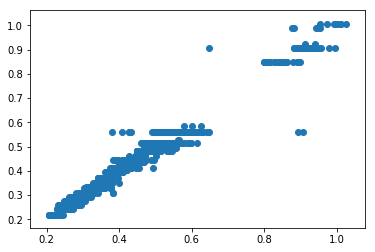

In [70]:
plt.figure()
plt.scatter(ytest, y1)

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y1))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y1))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(ytest, y1)))

Mean Absolute Error: 0.015469162820862543
Mean Squared Error: 0.0006232646290252106
Root Mean Squared Error: 0.02496526845489971


In [72]:
fanalysis = ExtraTreesRegressor(max_depth=3, 
                                random_state=3393)

In [73]:
fanalysis.fit(X, Y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=3,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=3393, verbose=0, warm_start=False)

In [74]:
print(fanalysis.feature_importances_)

[0.         0.         0.26804156 0.         0.         0.
 0.         0.         0.00383137 0.00458747 0.00497725 0.
 0.         0.         0.         0.01998883 0.         0.
 0.         0.         0.         0.17356501 0.23491304 0.02078561
 0.0131109  0.         0.11692662 0.         0.         0.00913871
 0.00054161 0.00819446 0.0120033  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00610175
 0.         0.         0.         0.10329252]


In [75]:
feats = fanalysis.feature_importances_
range(len(feats))

range(0, 64)

In [76]:
fanalysis.decision_path(X)

(<7952x150 sparse matrix of type '<class 'numpy.int64'>'
 	with 318080 stored elements in Compressed Sparse Row format>,
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150], dtype=int32))

In [77]:
fanalysis.score(X, Y)

0.9202165462960563

In [78]:
def feature_importance(X, Y, mx_depth):
    model = ExtraTreesRegressor(max_depth=mx_depth,
                                random_state=3393)
    model.fit(X, Y)
    features = model.feature_importances_
    important_features = []
    important_features_values = []
    for i in range(len(features)):
        if features[i] != 0.0:
            important_features.append(vals[i])
            important_features_values.append(features[i])
    return important_features, important_features_values

In [79]:
feature_importance(X, Y, 3)

(['CHkW',
  'CHWST',
  'CHWST2',
  'CHWST3',
  'CHWV14',
  'CHWV20',
  'CHWV21',
  'CHWV22',
  'CHWV23',
  'CHWV25',
  'CHWV3',
  'CHWV4',
  'CHWV5',
  'CHWV6',
  'PCHWP4HZ',
  'PCHWP4SS'],
 [0.2680415604328713,
  0.0038313693091662263,
  0.00458746898871287,
  0.004977246063560889,
  0.019988831226775985,
  0.17356501365180596,
  0.23491303576734648,
  0.02078561292150778,
  0.013110897293073989,
  0.11692661661891117,
  0.009138710098827253,
  0.0005416056065955691,
  0.008194455934108036,
  0.012003303510689112,
  0.006101752585238327,
  0.10329251999080906])

In [80]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [81]:
clf = GradientBoostingRegressor(**params)

In [82]:
clf.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [83]:
mse = mean_squared_error(ytest, clf.predict(xtest))

In [84]:
print('MSE: %.4f' % mse)

MSE: 0.0002


In [85]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

In [86]:
for i, ypred in enumerate(clf.staged_predict(xtest)):
    test_score[i] = clf.loss_(ytest, ypred)

Text(0,0.5,'Deviance')

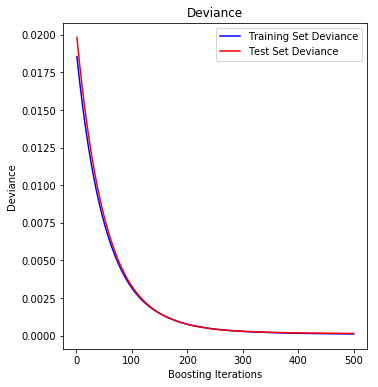

In [87]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

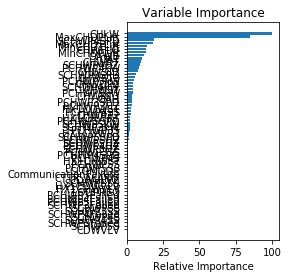

In [88]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1,2,1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, bas.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [89]:
x = bas.columns[sorted_idx]

In [90]:
print(x)

Index(['CDWVLV', 'SCHWP5S', 'SCHWP5Failed', 'SCHWP4SS', 'SCHWP4S',
       'SCHWP4Failed', 'SCHWP3SS', 'SCHWP3S', 'SCHWP3Failed', 'PCHWP5Failed',
       'PCHWP4Failed', 'PCHWP3Failed', 'LOOPREQ', 'HX1CHWVLV', 'HX1CDWVLV',
       'SCHWP5SS', 'CDWVLV2', 'CTTR_ALARM', 'CommunicationFailure', 'CLGMODE',
       'PCHWP5SS', 'PCHWP5S', 'HX1CHWST', 'PCHWP4S', 'PCHWP4SPD', 'PCHWP3SS',
       'SCHWP3HZ', 'PCHWP4HZ', 'SCHWP5HZ', 'PCHWP5HZ', 'SCHWP5SPD', 'HX1CDWRT',
       'PCHWP3S', 'SCHWP3kW', 'SCHWP5kW', 'PCHWP5SPD', 'HX1CHWRT', 'CHWRT2',
       'PCHWP4SS', 'HX1CDWST', 'PCHWP3HZ', 'PCHWP3SPD', 'OAH', 'CHWRT3',
       'PCHWP5kW', 'CHWST', 'SCHWP4kW', 'CHWDP2', 'PCHWP3kW', 'CHWST3',
       'SCHWP3SPD', 'CHWST2', 'PCHWP4kW', 'SCHWP4HZ', 'CHWRT', 'OAT', 'OAWB',
       'MinCHDPLift', 'CHWFLO', 'MinCHDTLift', 'MaxCHDTLift', 'SCHWP4SPD',
       'MaxCHDPLift', 'CHkW'],
      dtype='object')


In [91]:
print(sorted_idx)

[ 0 61 58 57 55 52 51 49 46 40 34 28 20 19 16 63  1 13 12 11 45 43 18 37
 38 33 47 35 59 41 62 14 31 48 60 44 17  6 39 15 29 32 25  7 42  8 54  3
 30 10 50  9 36 53  5 26 27 23  4 24 22 56 21  2]


In [92]:
print(feature_importance[sorted_idx])
imp = feature_importance[sorted_idx]

[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.34317062   0.40538296   0.41648425   0.54563346   0.60701757
   0.74109947   0.84430713   0.93290807   0.94819071   1.43502902
   1.54001127   1.55751417   1.78836895   1.80636952   1.82775555
   2.01551256   2.29926852   2.58175615   2.71158963   3.12033101
   3.21773242   3.26111542   3.62672096   3.80795338   4.09108868
   4.12040578   4.2554733    4.48993225   4.95216402   5.27630898
   6.07993346   7.80533317   8.54404182   9.21268579  10.00199171
  10.24496952  12.08983139  13.26066637  13.424235    14.10991753
  18.25114818  18.63161025  85.2340523  100.        ]


In [93]:
df_plt1_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [94]:
df_plt1_feats

,feat_import,feature_name
0,0.000000,CDWVLV
1,0.000000,SCHWP5S
2,0.000000,SCHWP5Failed
3,0.000000,SCHWP4SS
4,0.000000,SCHWP4S
5,0.000000,SCHWP4Failed
6,0.000000,SCHWP3SS
7,0.000000,SCHWP3S
8,0.000000,SCHWP3Failed
9,0.000000,PCHWP5Failed
